# iMPORTING

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/MLminiprojectdata - Sheet1.csv')
df.head()

,Product Description,Admission No,Loan No,Scheme,Sanctioned Amount,Loan Period In Months,ROI,Penal ROI(%),IOD(%),Outstanding Principle,Outstanding Interest,Age,Gender (M/F)
0,Normal KCC,1.0,6.910000e+09,SAO,228000.0,15.0,6.0,2.0,10.75,228000.0,12593.0,62.0,Male
1,Normal KCC,7.0,6.910000e+09,SAO,44000.0,15.0,6.0,2.0,10.75,41745.0,2420.0,65.0,Male
2,Normal KCC,9.0,6.910000e+09,SAO,49950.0,14.0,6.0,2.0,10.75,49950.0,13042.0,80.0,Male
3,Normal KCC,10.0,6.910000e+09,SAO,118000.0,15.0,6.0,2.0,10.75,117390.0,6517.0,39.0,Male
4,Normal KCC,20.0,6.910000e+09,SAO,47250.0,13.0,6.0,2.0,10.75,8969.0,21037.0,NaN,Male


# Data cleaning

In [ ]:
df.describe()

,Admission No,Loan No,Sanctioned Amount,Loan Period In Months,ROI,Penal ROI(%),IOD(%),Outstanding Principle,Outstanding Interest,Age
count,71.000000,7.100000e+01,71.000000,71.000000,71.0,71.0,71.00,71.000000,71.000000,32.000000
mean,300.126761,6.910000e+09,57973.239437,14.197183,6.0,2.0,10.75,53353.816901,5209.408451,61.406250
std,173.309049,0.000000e+00,48722.073929,1.644208,0.0,0.0,0.00,49500.938408,7856.778127,14.403986
min,1.000000,6.910000e+09,5550.000000,10.000000,6.0,2.0,10.75,975.000000,232.000000,30.000000
25%,128.000000,6.910000e+09,22000.000000,14.000000,6.0,2.0,10.75,20101.000000,1107.500000,53.750000
50%,362.000000,6.910000e+09,44000.000000,15.000000,6.0,2.0,10.75,41745.000000,3030.000000,63.000000
75%,419.500000,6.910000e+09,77950.000000,15.000000,6.0,2.0,10.75,69778.000000,5010.000000,73.250000
max,592.000000,6.910000e+09,228000.000000,22.000000,6.0,2.0,10.75,228000.000000,46155.000000,82.000000


In [ ]:
df.isna().sum()

,0
Product Description,1
Admission No,1
Loan No,1
Scheme,1
Sanctioned Amount,1
Loan Period In Months,1
ROI,1
Penal ROI(%),1
IOD(%),1
Outstanding Principle,1


In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

<ipython-input-5-7ee7fe972bc2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [ ]:
df.dropna(inplace=True)

In [ ]:
# identiyfing the columns with low variance
numerical_cols = df.select_dtypes(include=np.number).columns
variance_dict = df[numerical_cols].var().to_dict()

print("Variance for each numerical column:")
for col, variance in variance_dict.items():
    print(f"{col}: {variance}")

Variance for each numerical column:
Admission No: 30036.026559356134
Loan No: 0.0
Sanctioned Amount: 2373840487.9275675
Loan Period In Months: 2.7034205231388375
ROI: 0.0
Penal ROI(%): 0.0
IOD(%): 0.0
Outstanding Principle: 2450342903.2659955
Outstanding Interest: 61728962.53078469
Age: 91.88169642857143


# Feature Extraction

In [ ]:
# removing the features with low variance and also the catorigical data
# Identify columns with zero variance
zero_variance_cols = [col for col, var in variance_dict.items() if var == 0]

# Remove columns with zero variance
Newdf = df.drop(columns=zero_variance_cols)

data = Newdf[['Sanctioned Amount', 'Loan Period In Months', 'Age']]
data.head()

,Sanctioned Amount,Loan Period In Months,Age
0,228000.0,15.0,62.00000
1,44000.0,15.0,65.00000
2,49950.0,14.0,80.00000
3,118000.0,15.0,39.00000
4,47250.0,13.0,61.40625


In [ ]:
# Define features and target variable
X = data[['Loan Period In Months', 'Age']]  # Features: Loan Duration and Age
y = data['Sanctioned Amount']  # Target: Sanctioned Amount

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data visualization

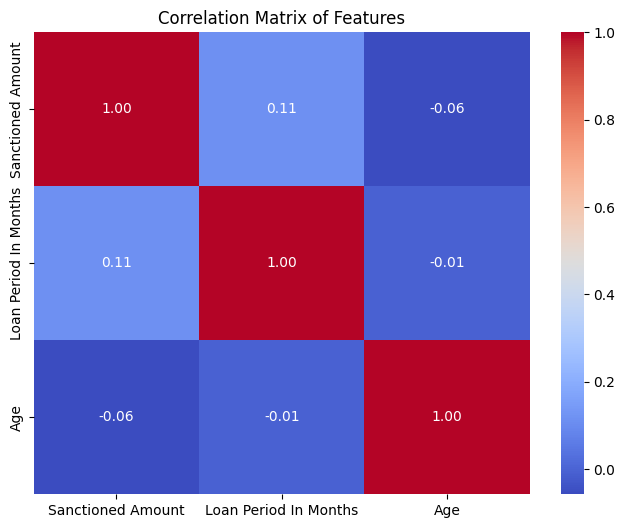

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()


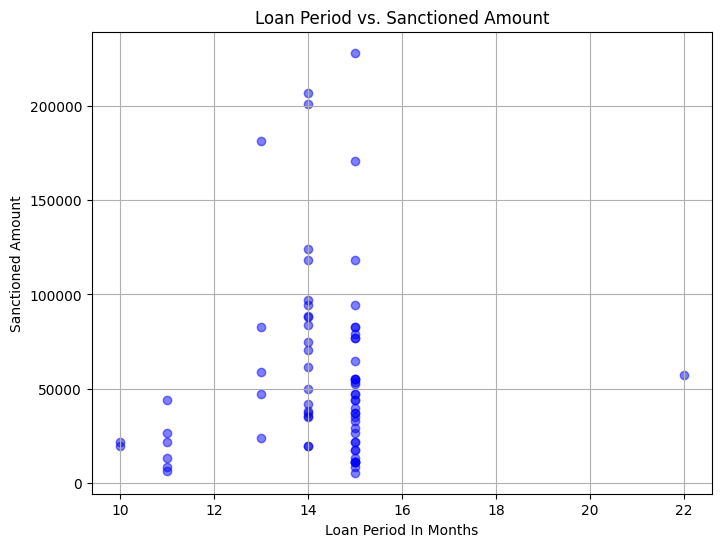

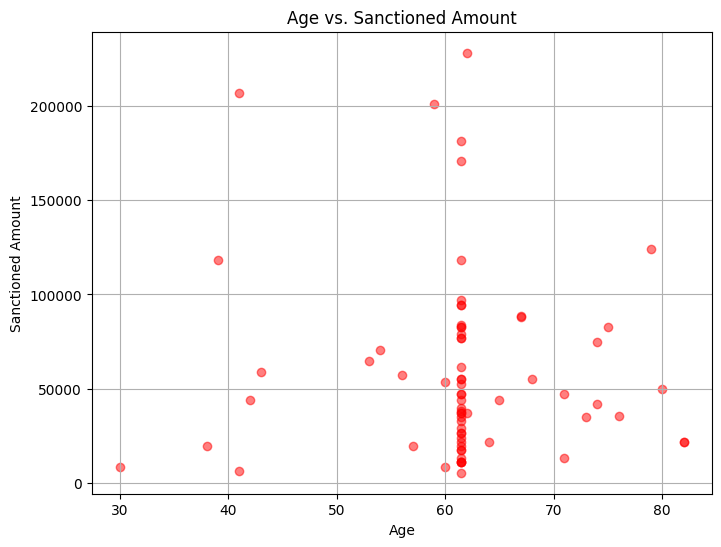

In [ ]:
# prompt: DRAW A SACTTER PLOT FOR AGANDLOPADN PERIOD VS SCENTIONED AMOUNT DRAW 2 DIFFERENT PLOTS

import matplotlib.pyplot as plt


# Scatter plot 1: Loan Period vs. Sanctioned Amount
plt.figure(figsize=(8, 6))
plt.scatter(data['Loan Period In Months'], data['Sanctioned Amount'], color='blue', alpha=0.5)
plt.xlabel('Loan Period In Months')
plt.ylabel('Sanctioned Amount')
plt.title('Loan Period vs. Sanctioned Amount')
plt.grid(True)
plt.show()

# Scatter plot 2: Age vs. Sanctioned Amount
plt.figure(figsize=(8, 6))
plt.scatter(data['Age'], data['Sanctioned Amount'], color='red', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Sanctioned Amount')
plt.title('Age vs. Sanctioned Amount')
plt.grid(True)
plt.show()


# linear reggression

In [ ]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


Mean Squared Error: 4159845084.3535695
R-squared: -0.07967089480406231
Mean Absolute Error: 45093.12191895462


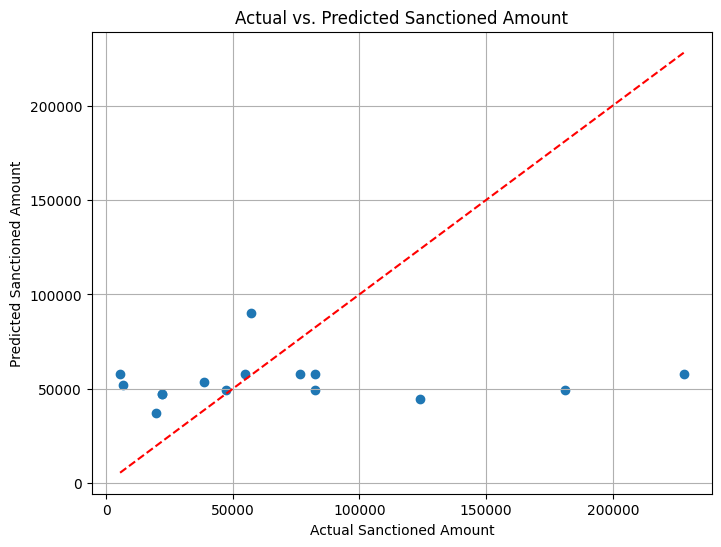

In [ ]:

import matplotlib.pyplot as plt

# Plot the actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Add a diagonal line
plt.xlabel("Actual Sanctioned Amount")
plt.ylabel("Predicted Sanctioned Amount")
plt.title("Actual vs. Predicted Sanctioned Amount")
plt.grid(True)
plt.show()


In [ ]:
# Sample input (replace with your actual input)
sample_input = np.array([[12, 30]])  # Example: Loan Period = 12 months, Age = 30 years

# Make prediction using the trained model
sample_prediction = model.predict(sample_input)

print(f"Prediction for sample input: {sample_prediction}")


Prediction for sample input: [62046.7795791]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Polynomial reggression


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# degree = 2 #@param {type:"slider", min:2, max:5, step:1}

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
# Train a linear regression model on the polynomial features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)


LinearRegression()

In [ ]:
# Make predictions on the test set
y_pred_poly = poly_model.predict(X_test_poly)

In [ ]:
# Evaluate the model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)

print(f"Polynomial Regression (degree={2}):")
print(f"Mean Squared Error: {mse_poly}")
print(f"R-squared: {r2_poly}")
print(f"Mean Absolute Error: {mae_poly}")

Polynomial Regression (degree=2):
Mean Squared Error: 33136469245.164726
R-squared: -7.600435995835618
Mean Absolute Error: 84758.98007479825


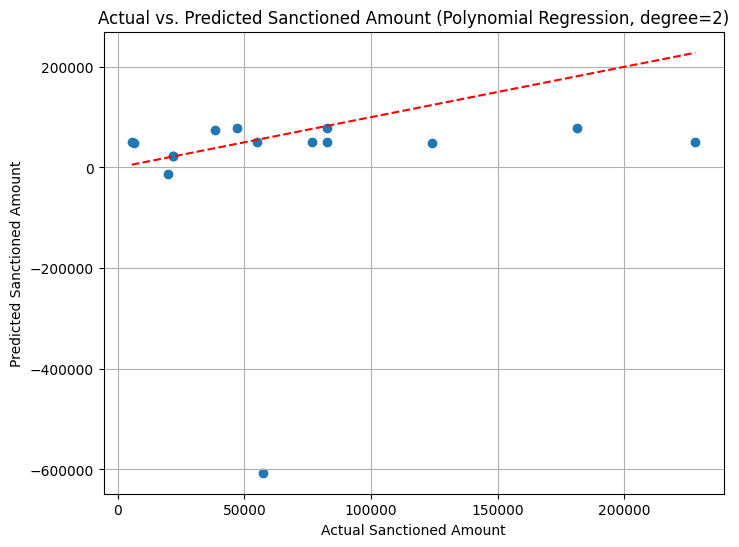

In [ ]:
# Plot the actual vs. predicted values for polynomial regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_poly)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Sanctioned Amount")
plt.ylabel("Predicted Sanctioned Amount")
plt.title(f"Actual vs. Predicted Sanctioned Amount (Polynomial Regression, degree={2})")
plt.grid(True)
plt.show()

In [ ]:
# Sample prediction with polynomial features
sample_input_poly = poly.transform(sample_input)
sample_prediction_poly = poly_model.predict(sample_input_poly)
print(f"Polynomial Regression Prediction for sample input: {sample_prediction_poly}")

Polynomial Regression Prediction for sample input: [73404.56509361]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [ ]:
# prompt: now find the best degree for the polynimial model

import numpy as np
mse_values = []
r2_values = []
mae_values = []

for degree in range(2, 6):  # Try degrees from 2 to 5
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    y_pred_poly = poly_model.predict(X_test_poly)

    mse_poly = mean_squared_error(y_test, y_pred_poly)
    r2_poly = r2_score(y_test, y_pred_poly)
    mae_poly = mean_absolute_error(y_test, y_pred_poly)

    mse_values.append(mse_poly)
    r2_values.append(r2_poly)
    mae_values.append(mae_poly)

    print(f"Polynomial Regression (degree={degree}):")
    print(f"Mean Squared Error: {mse_poly}")
    print(f"R-squared: {r2_poly}")
    print(f"Mean Absolute Error: {mae_poly}")

# Find the best degree based on the lowest MSE or highest R-squared
best_degree_mse = np.argmin(mse_values) + 2
best_degree_r2 = np.argmax(r2_values) + 2

print(f"\nBest degree based on lowest MSE: {best_degree_mse}")
print(f"Best degree based on highest R-squared: {best_degree_r2}")


Polynomial Regression (degree=2):
Mean Squared Error: 33136469245.164726
R-squared: -7.600435995835618
Mean Absolute Error: 84758.98007479825
Polynomial Regression (degree=3):
Mean Squared Error: 923438161875.911
R-squared: -238.6746240091574
Mean Absolute Error: 322512.4103655172
Polynomial Regression (degree=4):
Mean Squared Error: 163954576104584.38
R-squared: -42552.744262225424
Mean Absolute Error: 3464931.8468939224
Polynomial Regression (degree=5):
Mean Squared Error: 7240630937578059.0
R-squared: -1879275.349190225
Mean Absolute Error: 22260709.853768874

Best degree based on lowest MSE: 2
Best degree based on highest R-squared: 2


# Ridge (L2) Regression

In [ ]:
from sklearn.linear_model import Ridge

# Create and train the Ridge regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha (regularization strength)
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred_ridge = ridge_model.predict(X_test)

In [ ]:
# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

print("\nRidge Regression:")
print(f"Mean Squared Error: {mse_ridge}")
print(f"R-squared: {r2_ridge}")
print(f"Mean Absolute Error: {mae_ridge}")


Ridge Regression:
Mean Squared Error: 4159038026.023162
R-squared: -0.07946142609258855
Mean Absolute Error: 45085.46653328973


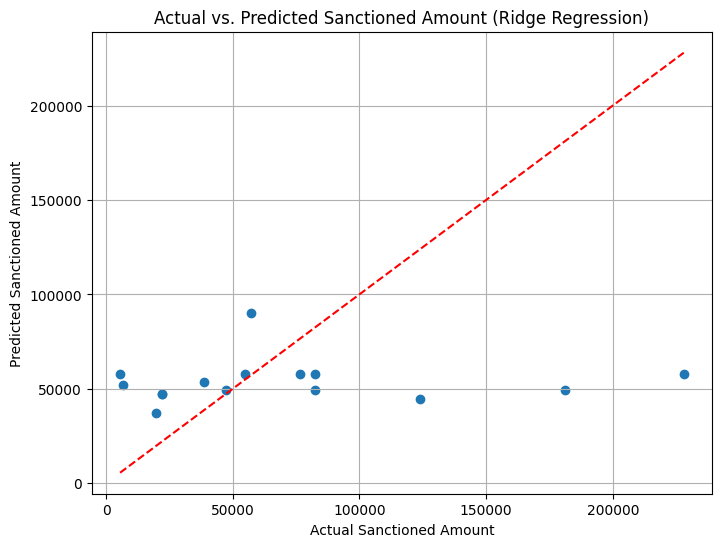

In [ ]:
# Plot the actual vs. predicted values for Ridge regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Sanctioned Amount")
plt.ylabel("Predicted Sanctioned Amount")
plt.title("Actual vs. Predicted Sanctioned Amount (Ridge Regression)")
plt.grid(True)
plt.show()


In [ ]:

# Sample prediction with Ridge regression
sample_prediction_ridge = ridge_model.predict(sample_input)
print(f"Ridge Regression Prediction for sample input: {sample_prediction_ridge}")


Ridge Regression Prediction for sample input: [62159.98023109]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


# Lasso (L1) Regression

In [ ]:
from sklearn.linear_model import Lasso

# alpha = 1.0 #@param {type:"slider", min:0.0, max:10.0, step:0.1}

# Create and train the Lasso regression model
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha (regularization strength)
lasso_model.fit(X_train, y_train)

Lasso()

In [ ]:
y_pred_lasso = lasso_model.predict(X_test)


In [ ]:

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

print("\nLasso Regression:")
print(f"Mean Squared Error: {mse_lasso}")
print(f"R-squared: {r2_lasso}")
print(f"Mean Absolute Error: {mae_lasso}")


Lasso Regression:
Mean Squared Error: 4159831844.089456
R-squared: -0.07966745834729227
Mean Absolute Error: 45093.01945129516


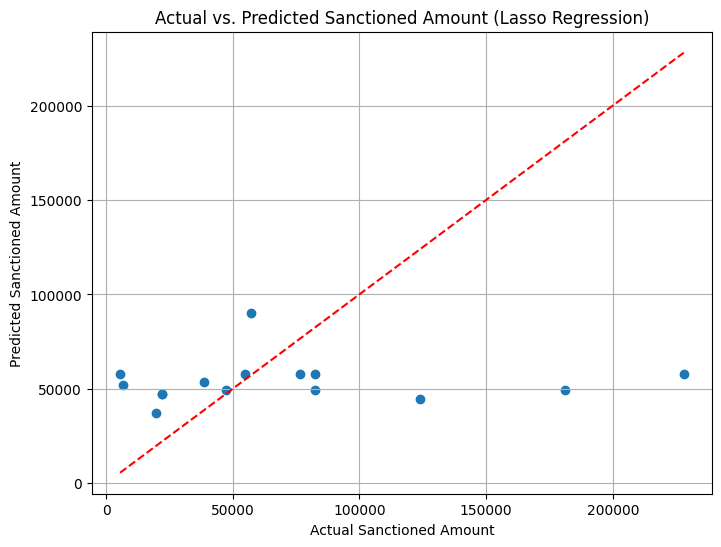

In [ ]:
# Plot the actual vs. predicted values for Lasso regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lasso)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Sanctioned Amount")
plt.ylabel("Predicted Sanctioned Amount")
plt.title("Actual vs. Predicted Sanctioned Amount (Lasso Regression)")
plt.grid(True)
plt.show()


In [ ]:

# Sample prediction with Lasso regression
sample_prediction_lasso = lasso_model.predict(sample_input)
print(f"Lasso Regression Prediction for sample input: {sample_prediction_lasso}")

Lasso Regression Prediction for sample input: [62047.9710936]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [ ]:


import pandas as pd
# Create a dictionary to store the evaluation metrics for each model
model_metrics = {
    "Linear Regression": {
        "MSE": mse,
        "R-squared": r2,
        "MAE": mae
    },
    "Polynomial Regression (degree=2)": {
        "MSE": mse_poly,
        "R-squared": r2_poly,
        "MAE": mae_poly
    },
    "Ridge Regression": {
        "MSE": mse_ridge,
        "R-squared": r2_ridge,
        "MAE": mae_ridge
    },
    "Lasso Regression": {
        "MSE": mse_lasso,
        "R-squared": r2_lasso,
        "MAE": mae_lasso
    }
}

# Create a DataFrame from the dictionary
metrics_df = pd.DataFrame(model_metrics).T

# Print the DataFrame
metrics_df


,MSE,R-squared,MAE
Linear Regression,4.159845e+09,-7.967089e-02,4.509312e+04
Polynomial Regression (degree=2),7.240631e+15,-1.879275e+06,2.226071e+07
Ridge Regression,4.159038e+09,-7.946143e-02,4.508547e+04
Lasso Regression,4.159832e+09,-7.966746e-02,4.509302e+04


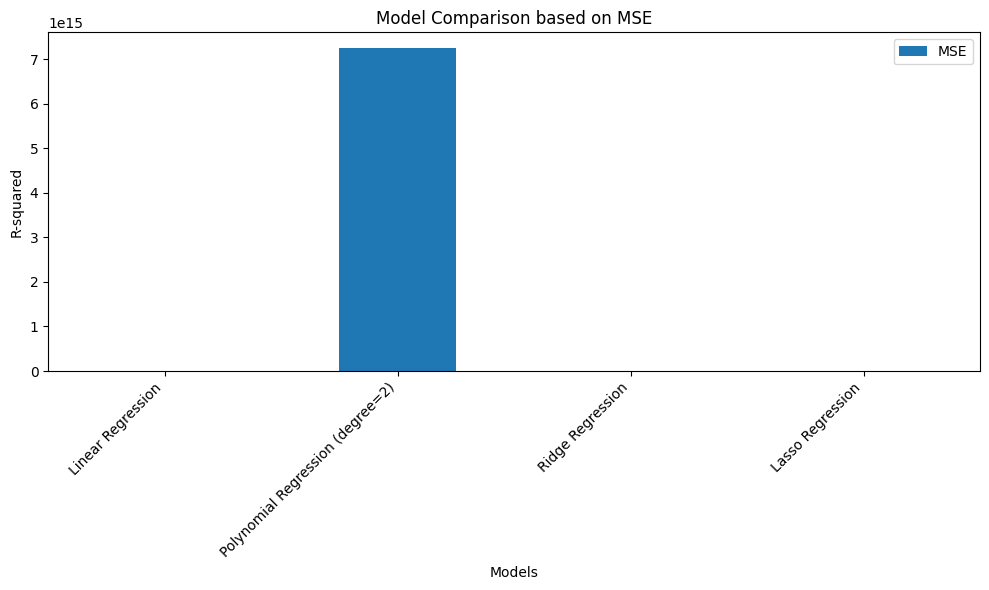

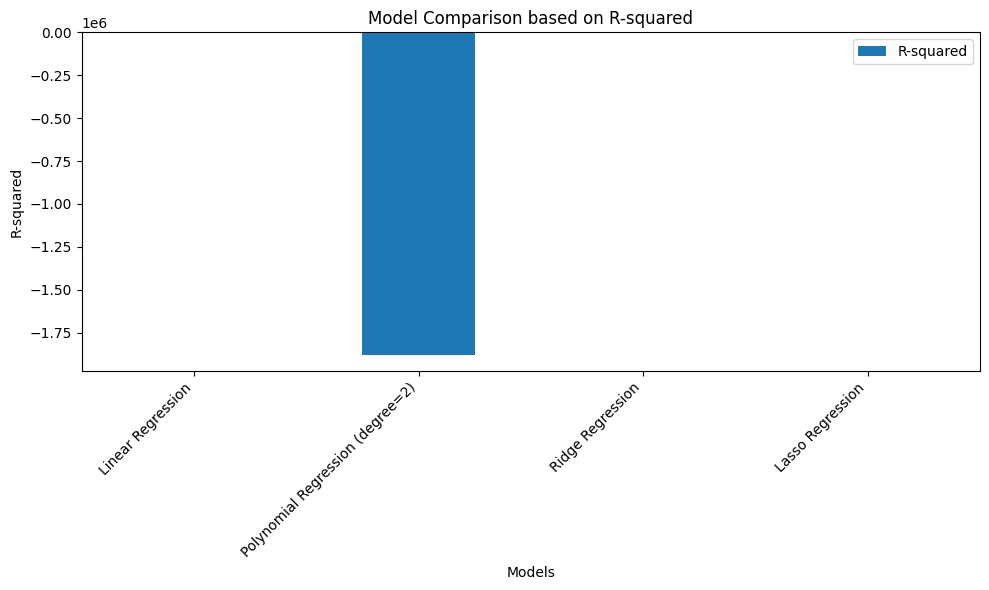

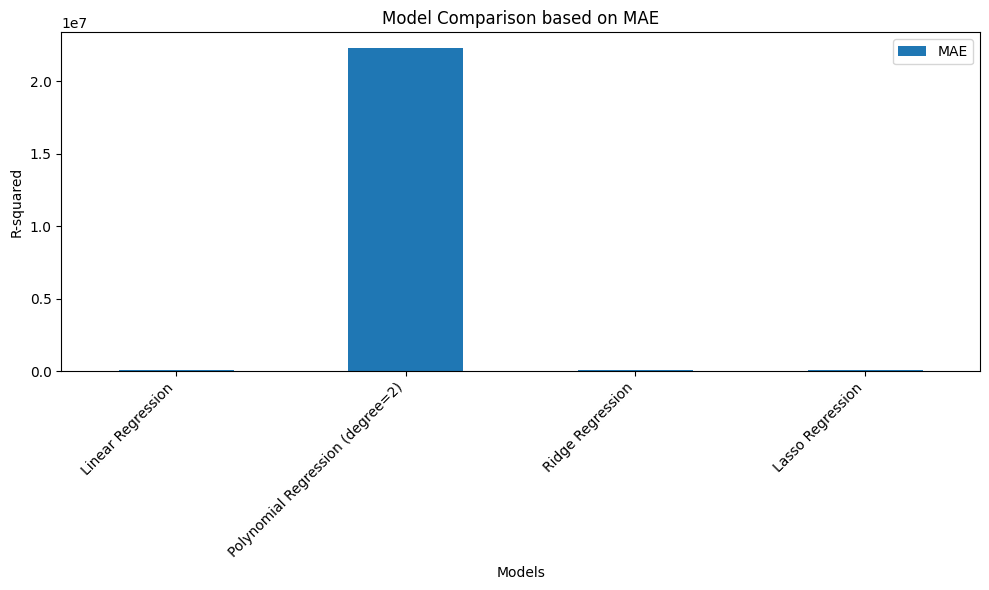

In [ ]:

import matplotlib.pyplot as plt

# Assuming metrics_df is already created as in your provided code
metrics_df.plot(y='MSE', kind='bar', figsize=(10, 6))
plt.title('Model Comparison based on MSE')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

metrics_df.plot(y='R-squared', kind='bar', figsize=(10, 6))
plt.title('Model Comparison based on R-squared')
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

metrics_df.plot(y='MAE', kind='bar', figsize=(10, 6))
plt.title('Model Comparison based on MAE')
plt.xlabel('Models')
plt.ylabel('MAE')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()
